In [173]:
import pandas as pd
import numpy as np

In [174]:
from tg.datasets import DatasetFactoryLookupCallback
from tg.model_interactor import ModelInteractor
from tg.splitters import AnchoredSplitter

In [175]:
# "AIR_PASSENGERS"
# "PERFECT_SINE30"
# "NOISY_SINE30"
# "HOMICIDES"
# "RANDOM_WALK"

In [176]:
dataset_name = "NOISY_SINE30"
data_factory = DatasetFactoryLookupCallback(dataset_name=dataset_name)

In [177]:
# 'NAIVE'
# 'ARIMA'
# 'SARIMA'
# 'RNN'
# 'SVR'
# 'ELM'
# 'STL'
# 'ES'
# 'LSTM'
# 'ARIMA_RNN'
# 'SARIMA_SVR'
# 'STL_ELM'
# 'ES_LSTM'

In [178]:
model_name = 'SVR'
params = {}


In [179]:
y, X = data_factory(model_name=model_name)

mi = ModelInteractor(model_name=model_name)
mi.load(y=y,
        X=X,
        dataset_name=data_factory.dataset_name,
        timesteps=data_factory.dataset().period,
        train_size=data_factory.dataset().train_size,
        stack_size=data_factory.dataset().stack_size)

trains, test = mi.split_trains_test(
    y=mi.y,
    splitter_class=AnchoredSplitter,
    splitter_args={'min_train_points': data_factory.dataset().train_size},
    X=mi.X)

preds = mi.fit_predict(trains=trains, test=test, parameters=params)
metrics = mi.evaluate(preds=preds, test=test)

# mi.execute_mlflow(
#     splitter_class=AnchoredSplitter,
#     splitter_args={'min_train_points': data_factory.dataset.train_size},
#     parameters=mi.get_best_params())

100%|██████████| 40/40 [00:00<00:00, 505.90it/s]


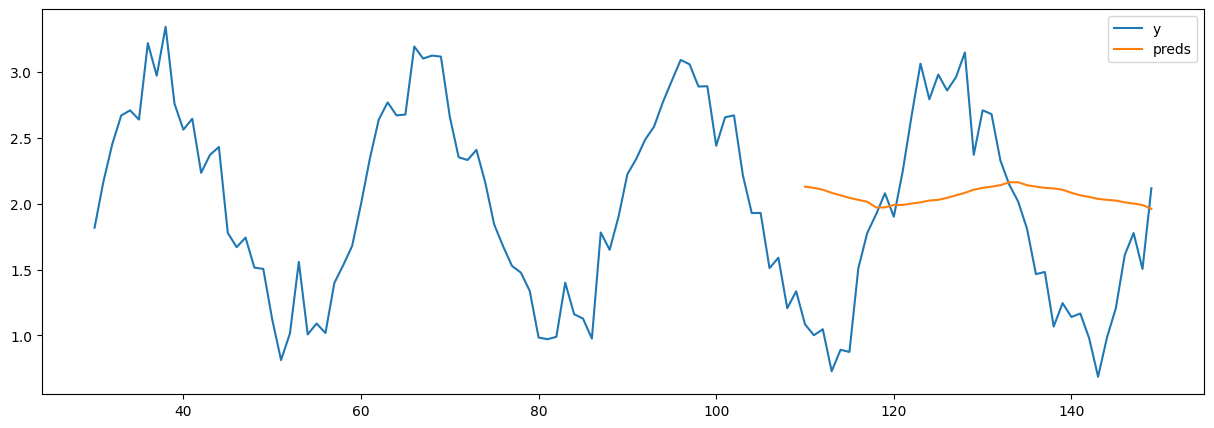

In [180]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y, label='y')
ax.plot(preds, label='preds')
ax.legend()

In [181]:
# import pmdarima

# y_aux = [
#     2, 2.2092864, 2.40930325, 2.59119156, 2.74689527, 2.86951807, 2.95362885,
#     2.99550224, 2.99328361, 2.94707123, 2.85891191, 2.73271032, 2.5740561,
#     2.38997623, 2.18862383, 1.97891705, 1.77014406, 1.57155167, 1.39193578,
#     1.23925181, 1.1202623, 1.04023746, 1.00272167, 1.00937657, 1.05990739,
#     1.15207607, 1.28180034, 1.44333455, 1.62952416, 1.8321226, 2.04215653,
#     2.2503233, 2.44740294, 2.62466656, 2.77426293, 2.88956625, 2.96546958,
#     2.99861108, 2.98752287, 2.93269607, 2.83655901, 2.70336972, 2.53902733,
#     2.35081076, 2.14705635, 1.93678863, 1.72932062, 1.53384133, 1.35900878,
#     1.21256652, 1.10100066, 1.02925257, 1.00050008, 1.01601667, 1.07511509,
#     1.17517779, 1.31177289, 1.4788504, 1.66901027, 1.87383008, 2.08423811,
#     2.29091513, 2.48470717, 2.65703093, 2.80025398
# ]

# pmdarima.auto_arima(np.array(y_aux), seasonal=True, m=30, max_p=5, max_q=5,
#                     max_P=5, max_Q=5, max_d=1, max_D=1, max_order=2,)

In [192]:
mi.tune_hyperparameters(splitter_class=AnchoredSplitter,
                        splitter_args={
                            'min_train_points':
                            data_factory.dataset().tuning_train_size
                        },
                        n_trials=2)


[I 2022-10-31 22:54:49,233] Using an existing study with name 'NOISY_SINE30/SVR/v1' instead of creating a new one.
100%|██████████| 70/70 [00:00<00:00, 125.12it/s]
[I 2022-10-31 22:54:49,876] Trial 29 finished with value: 0.297194220180531 and parameters: {'C': 37.96409560678997, 'epsilon': 0.008937993449218591, 'kernel': 'poly'}. Best is trial 21 with value: 0.1753783206604171.
100%|██████████| 100/100 [00:00<00:00, 1182.53it/s]
[I 2022-10-31 22:54:50,027] Trial 30 finished with value: 0.7321878876130514 and parameters: {'C': 0.4473233991995314, 'epsilon': 2.0079567066940482, 'kernel': 'rbf'}. Best is trial 21 with value: 0.1753783206604171.


{'C': 249.17920457666645, 'epsilon': 0.2808833464669256, 'kernel': 'poly'}

In [183]:
# mi.get_best_params()